In [ ]:
import os
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.geometry_utils import view_points
import numpy as np
from PIL import Image

In [ ]:
nusc = NuScenes(version='v1.0-mini', dataroot='/home/conjeevaram/wm/data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.249 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [3]:
# Get the first sample
sample = nusc.sample[0]
print('Sample token:', sample['token'])

Sample token: ca9a282c9e77460f8360f564131a8af5


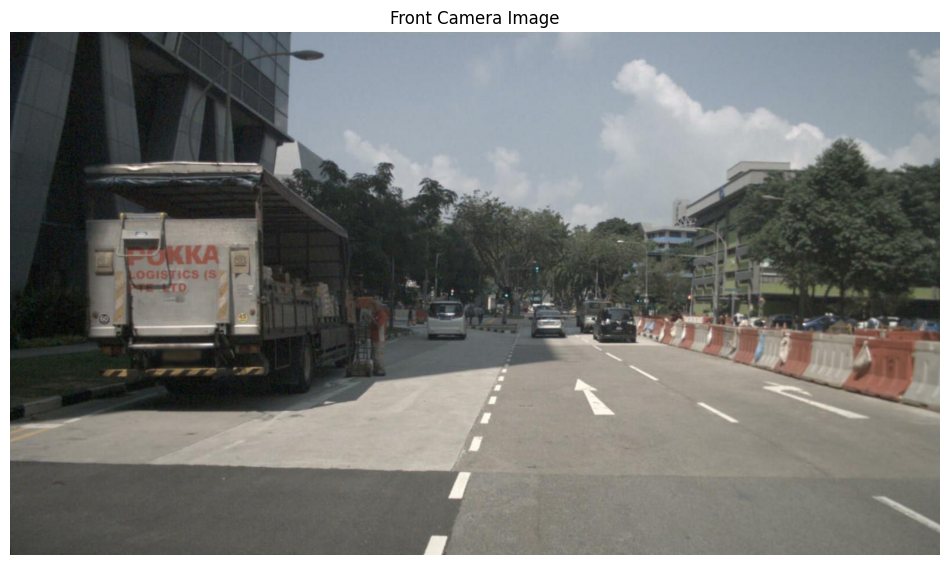

In [ ]:
# camera image
cam_front_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])
cam_front_path = os.path.join(nusc.dataroot, cam_front_data['filename'])
im = Image.open(cam_front_path)
plt.figure(figsize=(12, 8))
plt.imshow(im)
plt.title('Front Camera Image')
plt.axis('off')
plt.show()

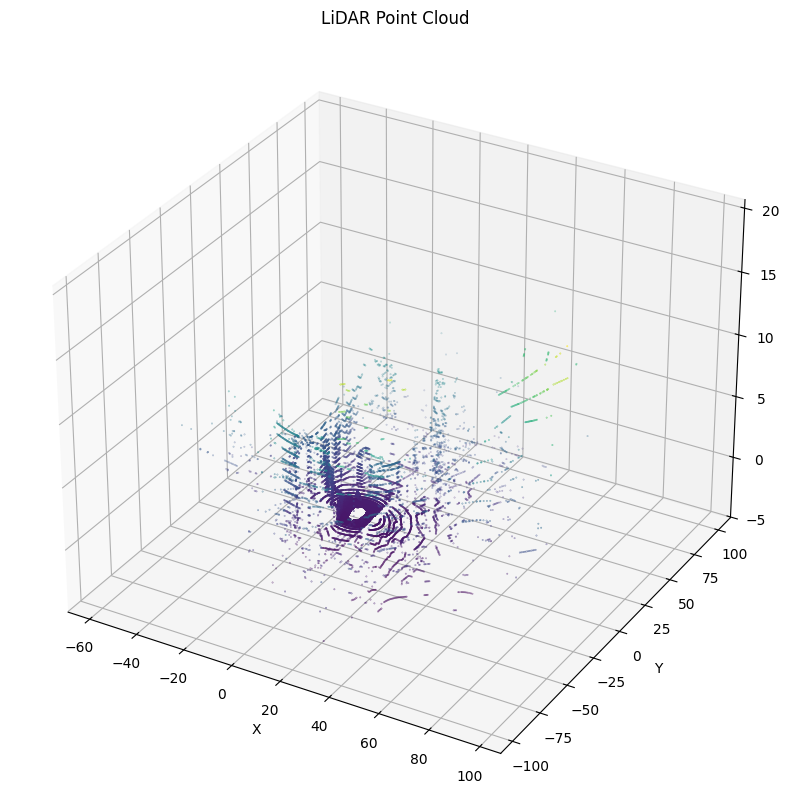

In [ ]:
# lidar point cloud
lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
lidar_path = os.path.join(nusc.dataroot, lidar_data['filename'])
pc = LidarPointCloud.from_file(lidar_path)
points = pc.points[:3, :]  # x, y, z

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0, :], points[1, :], points[2, :], s=0.1, c=points[2, :], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('LiDAR Point Cloud')
plt.show()